<a href="https://colab.research.google.com/github/AngeHdz/ProyectoIntegrador/blob/main/Avance4_35_Equipo_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://www.enroll-u.com/_i/1/7/7/4ecd9be0-eec4-11e9-9992-0231b47980f0.jpeg" width="256px">

### MATERIA
Proyecto Integrador

### Profesor  
Dra. Grettel Barceló Alonso

Dr. Luis Eduardo Falcón Morales
### Tutor  
Dra. María de la Paz Rico Fernández

### Nombre y Matrícula de los Integrantes del Equipo  
- A01793810 - Jerson David Pérez Contreras
- A01228278 - Norma de los Ángeles García López
- A01794256 - Angel De Jesús Hernández Pascual

  
### Actividad  
Avance 4. Modelos alternativos

### Fecha de Realización  
26 de Mayo del 2024

El dataset se alojó en kaglee para su facil tratamiento en equipo:

[Kaglee Dataset](https://www.kaggle.com/datasets/angelhdza01794256/telltales)

# Análisis

A continuacion se importan las librerias a utilizarse

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
# Se importan las librerias de Kaggle y Google Colab
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"angelhdza01794256","key":"5484f476559e6a6240e0f1baeffe7d9b"}'}

In [ ]:
# Se descarga el dataset
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download -c test-tell-tales

  0% 0.00/1.51M [00:00<?, ?B/s]
100% 1.51M/1.51M [00:00<00:00, 36.2MB/s]


In [ ]:
#Se realiza descomprecion de archivos
!unzip /content/test-tell-tales.zip

Archive:  /content/test-tell-tales.zip
  inflating: Train/Auto/Auto__20240505102212.jpg  
  inflating: Train/Auto/Auto__20240505102243.jpg  
  inflating: Train/Auto/Auto__20240505102308.jpg  
  inflating: Train/Auto/Auto__20240505102325.jpg  
  inflating: Train/Auto/Auto__20240505102344.jpg  
  inflating: Train/Auto/Auto__20240505102431.jpg  
  inflating: Train/Auto/Auto__20240505103935.jpg  
  inflating: Train/Auto/Auto__20240505103952.jpg  
  inflating: Train/Auto/Auto__20240505104009.jpg  
  inflating: Train/Auto/Auto__20240505104026.jpg  
  inflating: Train/Auto/Auto__20240505104044.jpg  
  inflating: Train/Auto/Auto__20240505104059.jpg  
  inflating: Train/Auto/Auto__20240505104113.jpg  
  inflating: Train/Auto/Auto__20240505104222.jpg  
  inflating: Train/Auto/Auto__20240505104243.jpg  
  inflating: Train/Cold/Cold__20240505104424.jpg  
  inflating: Train/Cold/Cold__20240505104513.jpg  
  inflating: Train/Cold/Cold__20240505104542.jpg  
  inflating: Train/Cold/Cold__2024050510460

In [ ]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
def load_images_from_folder(folder):
    images = []
    labels = []
    class_names = os.listdir(folder)

    for class_name in class_names:
        class_folder = os.path.join(folder, class_name)
        if not os.path.isdir(class_folder):
            continue
        for filename in os.listdir(class_folder):
            img_path = os.path.join(class_folder, filename)
            try:
                img = Image.open(img_path)
                img = img.convert('RGB')  # Asegurarse de que la imagen esté en formato RGB
                img = img.resize((128, 128))  # Redimensionar la imagen a un tamaño fijo
                img_array = np.array(img)
                images.append(img_array)
                labels.append(class_name)
            except Exception as e:
                print(f"Error al cargar la imagen {img_path}: {e}")

    return np.array(images), np.array(labels), class_names

In [ ]:
dataset_folder = '/content/Train'

In [ ]:
# Cargar las imágenes y etiquetas
X, y, class_names = load_images_from_folder(dataset_folder)
X = X / 255.0  # Normalizar las imágenes
# Opcional: dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
nsamples, nx, ny, nrgb = X_train.shape
x_trained = X_train.reshape((nsamples,nx*ny*nrgb))
x_trained.shape

(96, 49152)

In [ ]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

Evaluación y Selección del Modelo

SVM Accuracy: 1.0
SVM Classification Report:
                    precision    recall  f1-score   support

             Auto       1.00      1.00      1.00         2
             Cold       1.00      1.00      1.00         2
          ColdMax       1.00      1.00      1.00         3
DefrostFrontalMax       1.00      1.00      1.00         5
      DefrostRear       1.00      1.00      1.00         2
          FanDown       1.00      1.00      1.00         4
            FanUp       1.00      1.00      1.00         2
            Power       1.00      1.00      1.00         4

         accuracy                           1.00        24
        macro avg       1.00      1.00      1.00        24
     weighted avg       1.00      1.00      1.00        24

Random Forest Accuracy: 1.0
Random Forest Classification Report:
                    precision    recall  f1-score   support

             Auto       1.00      1.00      1.00         2
             Cold       1.00      1.00      1.00         2

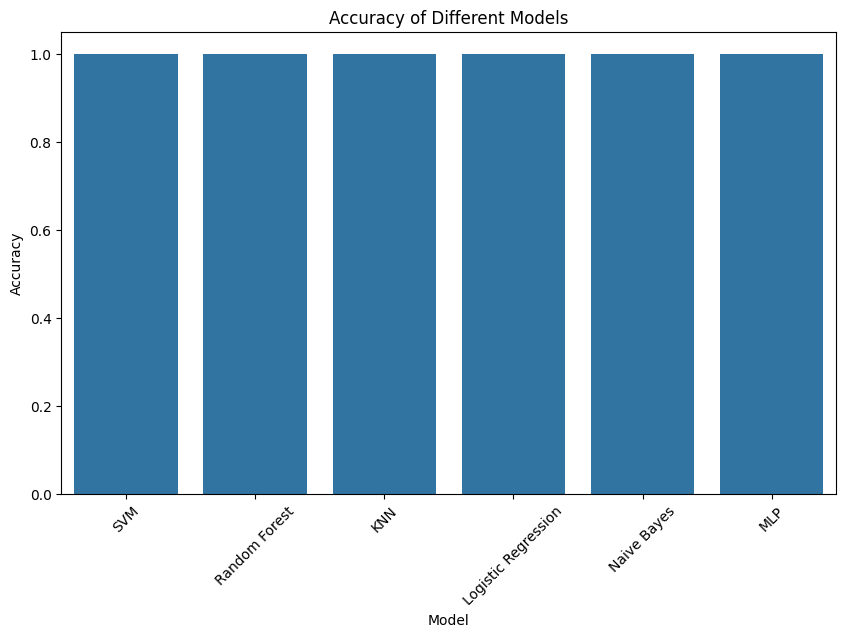

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report

# Crear una función para evaluar y almacenar resultados
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name, results):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy}")
    print(f"{model_name} Classification Report:\n", classification_report(y_test, y_pred))

# Almacenar los resultados
results = {}

# Evaluar los modelos
evaluate_model(SVC(kernel='linear'), X_train_flat, y_train, X_test_flat, y_test, "SVM", results)
evaluate_model(RandomForestClassifier(n_estimators=100, random_state=42), X_train_flat, y_train, X_test_flat, y_test, "Random Forest", results)
evaluate_model(KNeighborsClassifier(n_neighbors=5), X_train_flat, y_train, X_test_flat, y_test, "KNN", results)
evaluate_model(LogisticRegression(max_iter=1000), X_train_flat, y_train, X_test_flat, y_test, "Logistic Regression", results)
evaluate_model(GaussianNB(), X_train_flat, y_train, X_test_flat, y_test, "Naive Bayes", results)
evaluate_model(MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42), X_train_flat, y_train, X_test_flat, y_test, "MLP", results)

# Convertir los resultados a un DataFrame para facilitar la visualización
import pandas as pd
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])

# Visualizar los resultados
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title('Accuracy of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

Se agregan los resultados del modelo utilizado en .net en este caso utilizando la arquitectura MobilnetV2 de Tensorflow en el api ML.net, por esta razón el modelo no puede ser ejecutado en colab

Se crea repositorio del proyecto en .net8

https://github.com/AngeHdz/ImageClassification.git


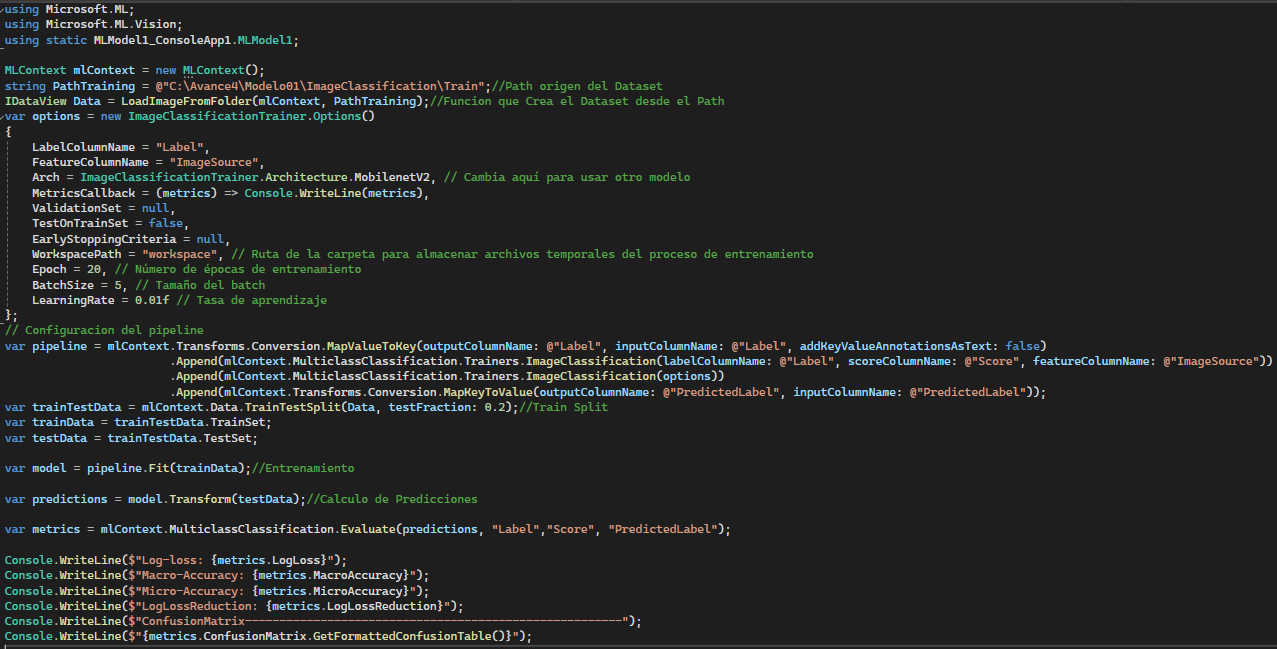



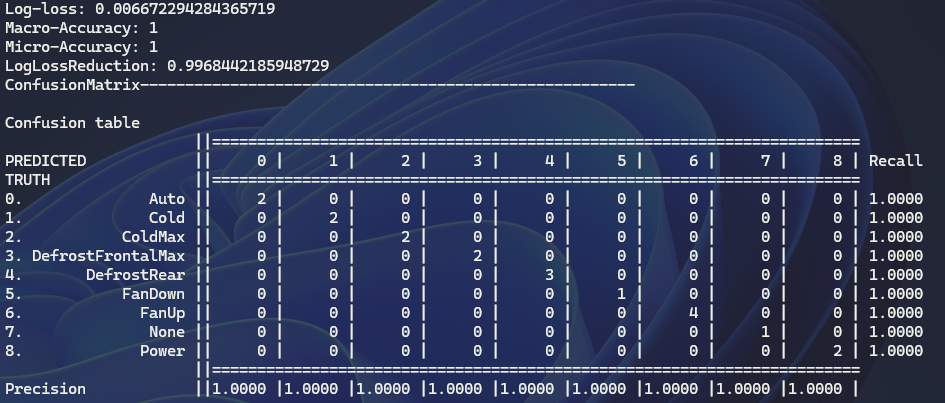

En la evaluación de modelos alternativos para la clasificación y reconocimiento de imágenes, se han utilizado varios algoritmos, cada uno con sus propias características y aplicaciones específicas. A continuación se presenta una breve descripción de cada modelo empleado en este proyecto:

##**Support Vector Machine (SVM) con kernel lineal:**

SVM es un modelo de aprendizaje supervisado que puede ser utilizado tanto para clasificación como para regresión. Utiliza hiperplanos en un espacio de alta dimensión para separar las diferentes clases.
Es particularmente útil en casos donde las clases son linealmente separables. El kernel lineal es adecuado cuando los datos pueden ser separados por una línea recta.
Evaluación: Se utiliza para determinar la capacidad del modelo para clasificar correctamente las imágenes en sus respectivas categorías.

## **Random Forest**

Es un modelo de conjunto que utiliza múltiples árboles de decisión para mejorar la precisión y controlar el sobreajuste. Cada árbol se entrena con una muestra diferente del conjunto de datos.
Es versátil y puede manejar grandes cantidades de datos con alta dimensionalidad. Es adecuado para tareas de clasificación complejas.
Permite medir la importancia de cada característica y proporciona una robusta precisión en la clasificación de imágenes.

## **K-Nearest Neighbors (KNN)**

KNN es un algoritmo de clasificación basado en la proximidad de los datos en el espacio de características. Clasifica un nuevo punto de datos basándose en los "K" puntos más cercanos de su vecindario.
Es simple y efectivo para conjuntos de datos pequeños y bien distribuidos. Es útil cuando la separación entre clases es clara y distinta.
Evalúa el modelo mediante la comparación de cada imagen con sus vecinos más cercanos para determinar su clase.

## **Regresión Logística:**

Es un modelo de regresión utilizado para tareas de clasificación binaria o multiclase. Estima la probabilidad de que una instancia pertenezca a una clase particular.
Es adecuado para problemas donde las relaciones entre las características y la salida pueden ser descritas mediante una función logística.
Evalúa la capacidad del modelo para predecir la probabilidad de pertenencia a cada clase y clasificar correctamente las imágenes.

## **Perceptrón Multicapa (MLP):**

Es un tipo de red neuronal artificial compuesta por múltiples capas de nodos (neuronas). Cada capa está completamente conectada a la siguiente.
Es eficaz en la captura de relaciones no lineales en los datos y es adecuado para tareas de clasificación complejas.
Se utiliza para medir la capacidad del modelo de aprender características complejas y patrones en las imágenes a través del entrenamiento iterativo.


Estos modelos se han evaluado utilizando un conjunto de datos de entrenamiento y pruebas, y los resultados se han recopilado para comparar su rendimiento.

Todos los modelos evaluados lograron una precisión del 100%, indicando que cada uno de ellos es altamente efectivo para la clasificación y reconocimiento de imágenes en este conjunto de datos específico. Este comportamiento tambien se ve muy enfluenciado en la limpieza previa de las imagenes untilizadas.


# **Seleccion de mejores modelos**


A pesar de que todos los modelos utilizados en el proyecto han alcanzado una precisión del 100%, lo que demuestra su capacidad para clasificar correctamente las imágenes, las mejores alternativas son la regresión logística y el Random Forest como las alternativas más viables.

La regresión logística es una excelente opción debido a su simplicidad y facilidad de implementación. Este modelo es muy intuitivo y rápido de entrenar, lo que es ideal para proyectos donde se busca una solución efectiva sin la necesidad de ajustes complicados. por otro lado, su alta precisión en este proyecto indica que puede manejar bien los datos proporcionados, sin requerir modificaciones adicionales en sus hiperparámetros.

Por otro lado, Random Forest es otra alternativa robusta y confiable. Aunque es un poco más complejo que la regresión logística, sigue siendo relativamente fácil de implementar y ajustar. Su capacidad para manejar grandes cantidades de datos y características lo convierte en una herramienta poderosa para tareas de clasificación. Random Forest es conocido por ser resistente al sobreajuste y por proporcionar buenos resultados con ajustes mínimos, lo que lo hace perfecto para este proyecto específico.

Ambos modelos, regresión logística y Random Forest, han demostrado ser altamente precisos y eficientes en este contexto. Su implementación sencilla y su rendimiento robusto justifican su elección como las mejores opciones, asegurando resultados confiables sin la necesidad de ajustes complicados en sus hiperparámetros.


# ** Modelo Final**

A pesar de que todos los modelos evaluados han demostrado una alta precisión en la clasificación y reconocimiento de imágenes, la selección final del modelo se basa en la implementación de un sistema de visión utilizando Machine Learning y OpenCV. Esta decisión responde al alcance del proyecto y a la facilidad de implementación en la industria, alineándose con los objetivos de eficiencia y calidad que se buscan.

El proyecto se enfoca en desarrollar una solución viable para la inspección cosmética visual de componentes automotrices mediante un algoritmo de Machine Learning implementado con ML.NET y OpenCV a través del wrapper EmguCV. Esta elección se justifica por varias razones clave:

Adaptabilidad y Mejora Continua: Al utilizar un sistema basado en aprendizaje automático, se permite la mejora continua del modelo a medida que se recopila más información y se identifican nuevas tendencias en los datos. Esto facilita la adaptación del sistema a los cambios en las condiciones del mercado y las necesidades del cliente, garantizando que la aplicación siga siendo relevante y efectiva a lo largo del tiempo.

Eficiencia Operativa: Implementar técnicas de aprendizaje automático en el piso de producción puede reducir significativamente el tiempo de procesamiento necesario para tareas como la inspección de materiales y la detección de defectos. Esto mejora la eficiencia operativa al acelerar los procesos de producción y reducir los cuellos de botella en la línea de ensamblaje.

Precisión en el Análisis: El uso de modelos de aprendizaje profundo, como los proporcionados por ML.NET y TensorFlow, permite identificar patrones y características complejas en los materiales con una precisión superior a los métodos tradicionales de inspección. Esto es crucial para mejorar la calidad del producto final y reducir los rechazos de clientes.

Capacidad de Implementación en la Industria: El sistema de visión basado en ML.NET y OpenCV está diseñado para ser fácil de implementar en el entorno de producción. A diferencia de otras soluciones, esta implementación no requiere ajustes complicados de hiperparámetros, lo que simplifica su integración y puesta en marcha.

Dado el progreso ya alcanzado en el proyecto y las ventajas mencionadas, la implementación de un modelo de Machine Learning con ML.NET y OpenCV se presenta como la alternativa más viable. Esta solución no solo cumple con los estándares de calidad que se requieren en el proyecto, sino que también supera las limitaciones del software actualmente utilizado, ofreciendo una capacidad ampliada para la clasificación y un proceso de inspección más eficiente y preciso.
